In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
#ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.cc","k")

Welcome to JupyROOT 6.28/00


In [2]:
def getNumVarsFromCode(code):
    nVars = 0
    while(code > 0):
        nVars += int(code%2)
        code = int(code/2)
    return nVars


def getTotalNumVars(modelName):
    splitted = modelName.split("_")
    numVars = getNumVarsFromCode(int(splitted[1].replace("df", "")))
    numVars += getNumVarsFromCode(int(splitted[2].replace("dl", "")))
    numVars += len(splitted) - 3
    if "opt" in modelName:
        numVars -= 1
    return numVars

modelNameOmega = "BDTG_df15_dl3684_v0_v1_opt11264"
modelNamePhi3 = "BDTG_df15_dl3684_v0_v1_opt10329"
modelNameD0Star = "BDTG_df7_dl3684_v0_v1_opt12167"

modelName=modelNameD0Star
modelName2=modelNameD0Star
#BDTG_df15_dl3684_v0_v1_opt10329
#BDTG_df15_dl3684_v0_v1_opt11264
#BDTG_df7_dl3684_v0_v1_opt12167
channel="d0star"

print(getTotalNumVars(modelName))

s = '''
    TMVA::Experimental::RReader modelScale0("/data/submit/pdmonte/TMVA_models/weightsOpts2/TMVARegression_{modelName}_{channel}_0.weights.xml");
    computeModelScale0 = TMVA::Experimental::Compute<{numVarsTotal}, float>(modelScale0);
    '''.format(modelName=modelName, channel=channel, numVarsTotal=getTotalNumVars(modelName))
s += '''
    TMVA::Experimental::RReader modelScale1("/data/submit/pdmonte/TMVA_models/weightsOpts2/TMVARegression_{modelName}_{channel}_1.weights.xml");
    computeModelScale1 = TMVA::Experimental::Compute<{numVarsTotal}, float>(modelScale1);
    '''.format(modelName=modelName, channel=channel, numVarsTotal=getTotalNumVars(modelName))
s += '''
    TMVA::Experimental::RReader modelScale2("/data/submit/pdmonte/TMVA_models/weightsOpts2/TMVARegression_{modelName}_{channel}_2.weights.xml");
    computeModelScale2 = TMVA::Experimental::Compute<{numVarsTotal}, float>(modelScale2);
    '''.format(modelName=modelName, channel=channel, numVarsTotal=getTotalNumVars(modelName))

ROOT.gInterpreter.ProcessLine(s)
variables = list(ROOT.modelScale0.GetVariableNames())

print(variables, len(variables))

s2 = '''
    TMVA::Experimental::RReader modelScale20("/data/submit/pdmonte/TMVA_models/weightsOpts2/TMVARegression_{modelName}_{channel}_0.weights.xml");
    computeModelScale20 = TMVA::Experimental::Compute<{numVarsTotal}, float>(modelScale20);
    '''.format(modelName=modelName2, channel=channel, numVarsTotal=getTotalNumVars(modelName2))
s2 += '''
    TMVA::Experimental::RReader modelScale21("/data/submit/pdmonte/TMVA_models/weightsOpts2/TMVARegression_{modelName}_{channel}_1.weights.xml");
    computeModelScale21 = TMVA::Experimental::Compute<{numVarsTotal}, float>(modelScale21);
    '''.format(modelName=modelName2, channel=channel, numVarsTotal=getTotalNumVars(modelName2))
s2 += '''
    TMVA::Experimental::RReader modelScale22("/data/submit/pdmonte/TMVA_models/weightsOpts2/TMVARegression_{modelName}_{channel}_2.weights.xml");
    computeModelScale22 = TMVA::Experimental::Compute<{numVarsTotal}, float>(modelScale22);
    '''.format(modelName=modelName2, channel=channel, numVarsTotal=getTotalNumVars(modelName2))

ROOT.gInterpreter.ProcessLine(s2)
variables2 = list(ROOT.modelScale20.GetVariableNames())

print(variables2, len(variables2))

11
['goodMeson_photon1_pt_input_pred', 'goodMeson_photon2_pt_input_pred', 'goodMeson_ditrk_mass_input_pred', 'goodMeson_ditrk_eta_input_pred', 'goodMeson_photon1_DR_input_pred', 'goodMeson_photon2_DR_input_pred', 'goodMeson_DR_input_pred', 'delta_eta_goodMeson_ditrk_goodPhoton_input_pred', 'delta_phi_goodMeson_ditrk_goodPhoton_input_pred', 'var0_input_pred', 'var1_input_pred'] 11
['goodMeson_photon1_pt_input_pred', 'goodMeson_photon2_pt_input_pred', 'goodMeson_ditrk_mass_input_pred', 'goodMeson_ditrk_eta_input_pred', 'goodMeson_photon1_DR_input_pred', 'goodMeson_photon2_DR_input_pred', 'goodMeson_DR_input_pred', 'delta_eta_goodMeson_ditrk_goodPhoton_input_pred', 'delta_phi_goodMeson_ditrk_goodPhoton_input_pred', 'var0_input_pred', 'var1_input_pred'] 11


In [3]:
date = "SEP25"
#channel = "d0star"
mesonCat = ""
mesonNum = 0
if (channel == "omega"):
    mesonCat = "OmegaCat"
    mesonNum = 1038
elif (channel == "phi"):
    mesonCat = "Phi3Cat"
    mesonNum = 1039
elif (channel == "d0starrho"):
    mesonCat = "D0StarRhoCat"
    mesonNum = 1040
elif (channel == "d0star"):
    mesonCat = "D0StarCat"
    mesonNum = 1041
else:
    raise Exception("Wrong channel.")

chainSGN0 = ROOT.TChain("events")
chainSGN1 = ROOT.TChain("events")
chainSGN2 = ROOT.TChain("events")
chainSGN0.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc{1}_GFcat_{2}_2018_sample0.root".format(date, mesonNum, mesonCat))
chainSGN1.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc{1}_GFcat_{2}_2018_sample1.root".format(date, mesonNum, mesonCat))
chainSGN2.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc{1}_GFcat_{2}_2018_sample2.root".format(date, mesonNum, mesonCat))

chainBKG = ROOT.TChain("events")
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc10_GFcat_{1}_2018.root".format(date, mesonCat))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc11_GFcat_{1}_2018.root".format(date, mesonCat))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc12_GFcat_{1}_2018.root".format(date, mesonCat))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc13_GFcat_{1}_2018.root".format(date, mesonCat))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc14_GFcat_{1}_2018.root".format(date, mesonCat))

dfSGN0 = ROOT.RDataFrame(chainSGN0)
dfSGN1 = ROOT.RDataFrame(chainSGN1)
dfSGN2 = ROOT.RDataFrame(chainSGN2)

dfSGN0 = (dfSGN0.Define("scale", "w*lumiIntegrated/3.")
        .Define("HCandMass_GEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta_GEN, goodMeson_phi_GEN, goodMeson_mass_GEN, goodPhotons_pt_GEN, goodPhotons_eta_GEN, goodPhotons_phi_GEN, 0)")
        .Define("HCandMass_varGEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("scaleFactor", ROOT.computeModelScale0, variables)
        .Define("scaleFactor2", ROOT.computeModelScale20, variables2)
        .Define("goodMeson_pt_PRED", "scaleFactor[0]*goodMeson_pt[0]")
        .Define("goodMeson_pt_PRED2", "scaleFactor2[0]*goodMeson_pt[0]")
        .Define("HCandMass_varPRED", "compute_HiggsVars_var(goodMeson_pt_PRED, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("HCandMass_varPRED2", "compute_HiggsVars_var(goodMeson_pt_PRED2, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)"))
dfSGN1 = (dfSGN1.Define("scale", "w*lumiIntegrated/3.")
        .Define("HCandMass_GEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta_GEN, goodMeson_phi_GEN, goodMeson_mass_GEN, goodPhotons_pt_GEN, goodPhotons_eta_GEN, goodPhotons_phi_GEN, 0)")
        .Define("HCandMass_varGEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("scaleFactor", ROOT.computeModelScale1, variables)
        .Define("scaleFactor2", ROOT.computeModelScale21, variables2)
        .Define("goodMeson_pt_PRED", "scaleFactor[0]*goodMeson_pt[0]")
        .Define("goodMeson_pt_PRED2", "scaleFactor2[0]*goodMeson_pt[0]")
        .Define("HCandMass_varPRED", "compute_HiggsVars_var(goodMeson_pt_PRED, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("HCandMass_varPRED2", "compute_HiggsVars_var(goodMeson_pt_PRED2, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)"))
dfSGN2 = (dfSGN2.Define("scale", "w*lumiIntegrated/3.")
        .Define("HCandMass_GEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta_GEN, goodMeson_phi_GEN, goodMeson_mass_GEN, goodPhotons_pt_GEN, goodPhotons_eta_GEN, goodPhotons_phi_GEN, 0)")
        .Define("HCandMass_varGEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("scaleFactor", ROOT.computeModelScale2, variables)
        .Define("scaleFactor2", ROOT.computeModelScale22, variables2)
        .Define("goodMeson_pt_PRED", "scaleFactor[0]*goodMeson_pt[0]")
        .Define("goodMeson_pt_PRED2", "scaleFactor2[0]*goodMeson_pt[0]")
        .Define("HCandMass_varPRED", "compute_HiggsVars_var(goodMeson_pt_PRED, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("HCandMass_varPRED2", "compute_HiggsVars_var(goodMeson_pt_PRED2, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)"))

dfBKG = ROOT.RDataFrame(chainBKG)
dfBKG = (dfBKG.Define("scale", "w*lumiIntegrated")
        .Define("scaleFactor0", ROOT.computeModelScale0, variables)
        .Define("scaleFactor1", ROOT.computeModelScale1, variables)
        .Define("scaleFactor2", ROOT.computeModelScale2, variables)
        .Define("scaleFactor20", ROOT.computeModelScale20, variables2)
        .Define("scaleFactor21", ROOT.computeModelScale21, variables2)
        .Define("scaleFactor22", ROOT.computeModelScale22, variables2)
        .Define("goodMeson_pt_PRED", "(scaleFactor0[0]*goodMeson_pt[0] + scaleFactor1[0]*goodMeson_pt[0] + scaleFactor2[0]*goodMeson_pt[0])/3")
        .Define("goodMeson_pt_PRED2", "(scaleFactor20[0]*goodMeson_pt[0] + scaleFactor21[0]*goodMeson_pt[0] + scaleFactor22[0]*goodMeson_pt[0])/3")
        .Define("HCandMass_varPRED", "compute_HiggsVars_var(goodMeson_pt_PRED, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("HCandMass_varPRED2", "compute_HiggsVars_var(goodMeson_pt_PRED2, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)"))
        

cols = ["goodMeson_pt", "goodMeson_pt_GEN", "goodMeson_pt_PRED", "scaleFactor"]
x = dfSGN0.AsNumpy(columns=cols)
pddf_SGN = pd.DataFrame(x)
#display(pddf_SGN)

goodMesonDiffReco = [x[0] for x in pddf_SGN["goodMeson_pt"].values] - pddf_SGN["goodMeson_pt_GEN"].values
goodMesonDiffPred = pddf_SGN["goodMeson_pt_PRED"].values - pddf_SGN["goodMeson_pt_GEN"].values
errorMesonReco = np.sqrt(np.mean(goodMesonDiffReco**2))
errorMesonPred = np.sqrt(np.mean(goodMesonDiffPred**2))
#print("RecoMeson:\t {:.9f}\t\tPredMeson:\t {:.9f}".format(round(errorMesonReco, 9), round(errorMesonPred, 9)))

cols = ["goodMeson_pt", "goodMeson_pt_PRED", "scaleFactor0"]
x = dfBKG.AsNumpy(columns=cols)
pddf_BKG = pd.DataFrame(x)
#display(pddf_BKG)


RECO 117-133:	 6378.6226069136765
PRED 117-133:	 6656.470019231013  + 4.4 %
PRED2 117-133:	 6656.470019231013  + 4.4 %


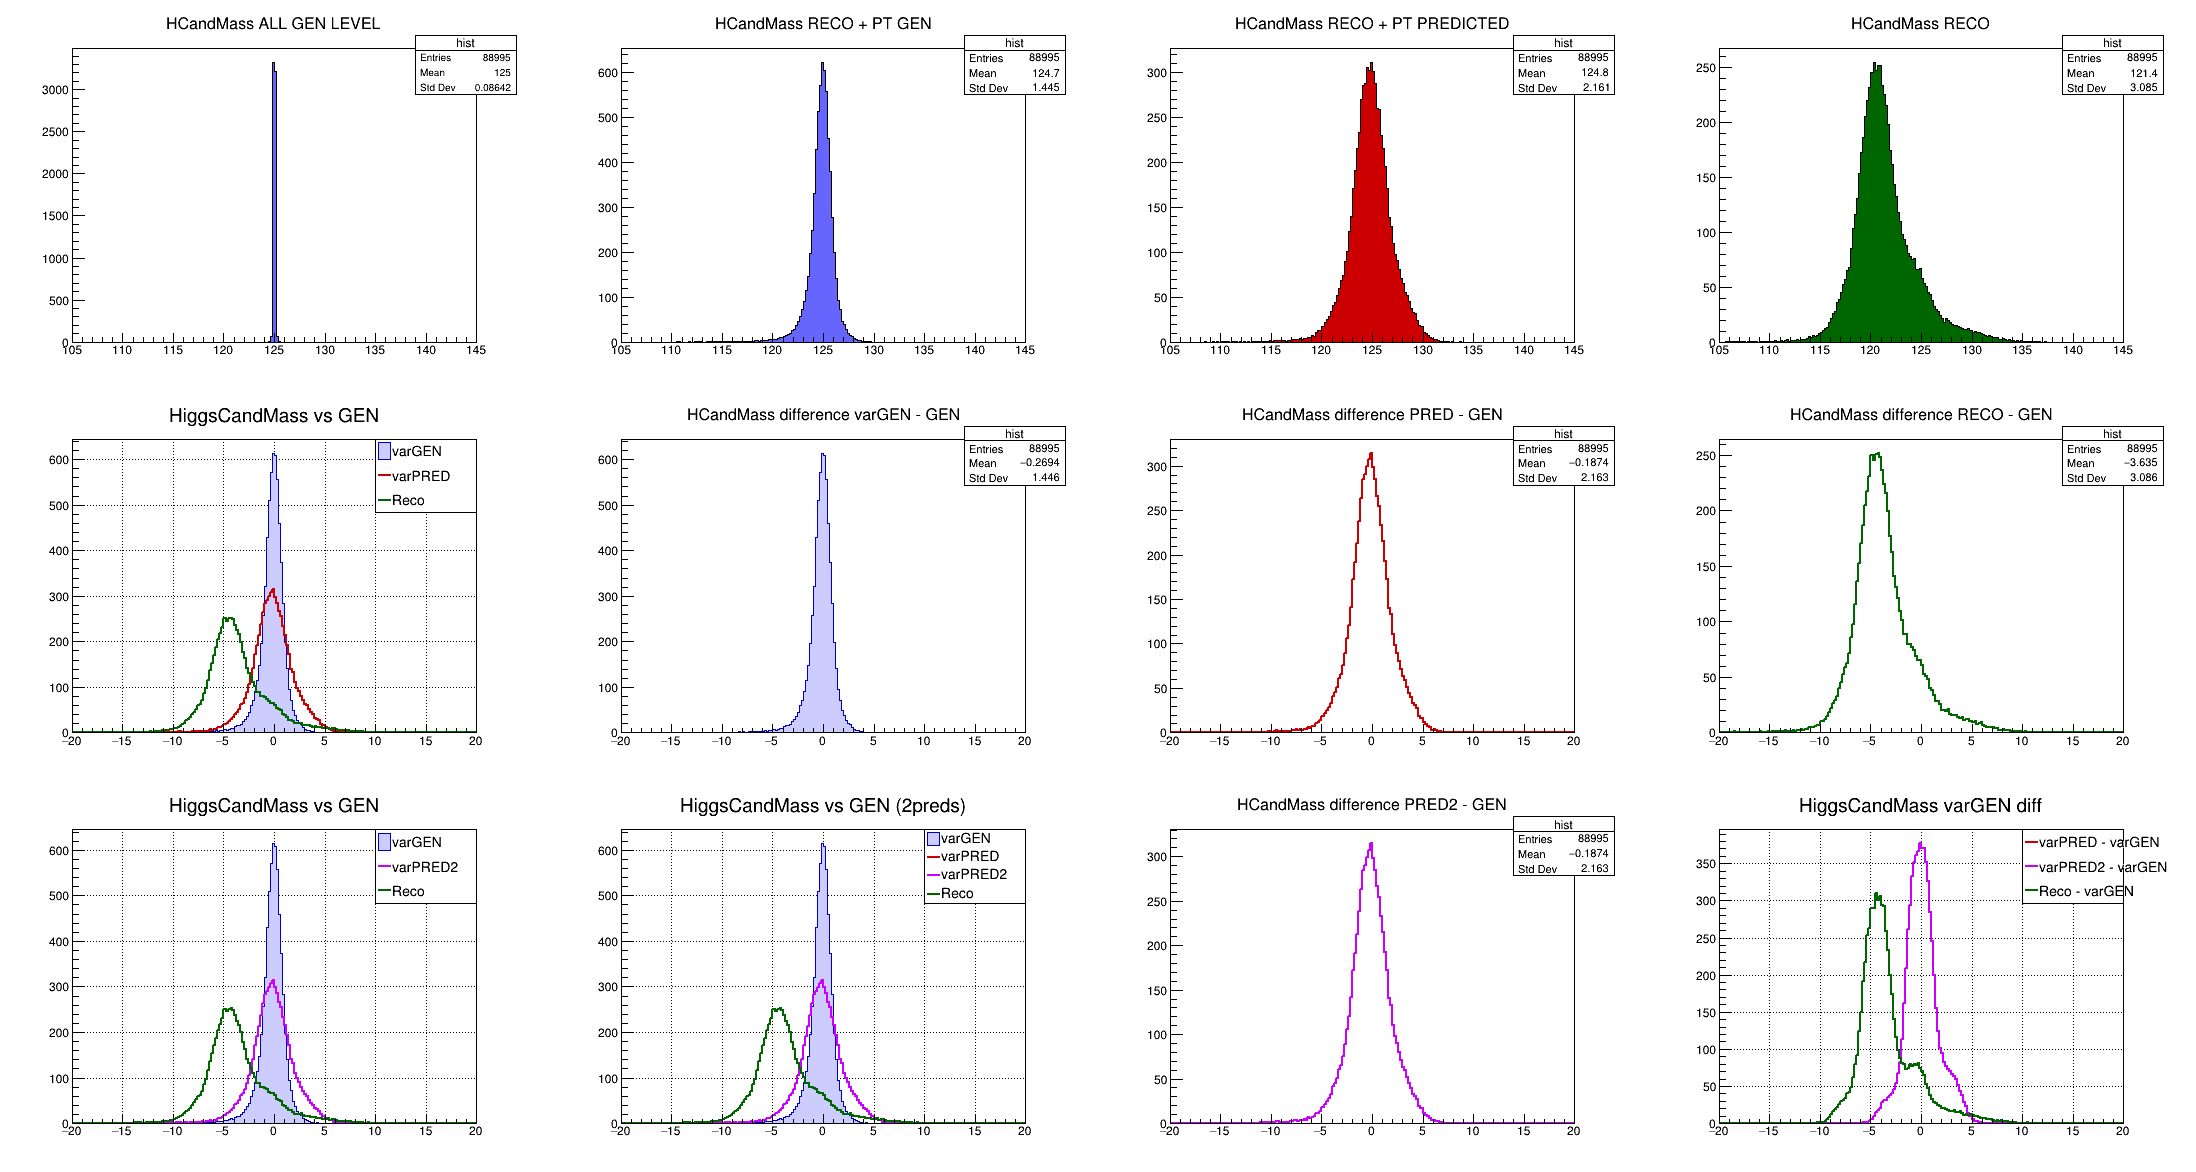

In [4]:
canvas = ROOT.TCanvas("canvas", "canvas", 2200, 1200)
canvas.Divide(4, 3)

nbins, xlow, xhigh = 200, 105, 145
xlowdiff, xhighdiff = -20, 20

h1 = dfSGN0.Histo1D(("hist", "HCandMass ALL GEN LEVEL", nbins, xlow, xhigh), "HCandMass_GEN", "scale").GetValue()
h1.Add(dfSGN1.Histo1D(("hist", "HCandMass ALL GEN LEVEL", nbins, xlow, xhigh), "HCandMass_GEN", "scale").GetValue())
h1.Add(dfSGN2.Histo1D(("hist", "HCandMass ALL GEN LEVEL", nbins, xlow, xhigh), "HCandMass_GEN", "scale").GetValue())

h2SGN = dfSGN0.Histo1D(("hist", "HCandMass RECO + PT GEN", nbins, xlow, xhigh), "HCandMass_varGEN", "scale").GetValue()
h2SGN.Add(dfSGN1.Histo1D(("hist", "HCandMass RECO + PT GEN", nbins, xlow, xhigh), "HCandMass_varGEN", "scale").GetValue())
h2SGN.Add(dfSGN2.Histo1D(("hist", "HCandMass RECO + PT GEN", nbins, xlow, xhigh), "HCandMass_varGEN", "scale").GetValue())

h3SGN = dfSGN0.Histo1D(("hist", "HCandMass RECO + PT PREDICTED", nbins, xlow, xhigh), "HCandMass_varPRED", "scale").GetValue()
h3SGN.Add(dfSGN1.Histo1D(("hist", "HCandMass RECO + PT PREDICTED", nbins, xlow, xhigh), "HCandMass_varPRED", "scale").GetValue())
h3SGN.Add(dfSGN2.Histo1D(("hist", "HCandMass RECO + PT PREDICTED", nbins, xlow, xhigh), "HCandMass_varPRED", "scale").GetValue())

h32SGN = dfSGN0.Histo1D(("hist", "HCandMass RECO + PT PREDICTED2", nbins, xlow, xhigh), "HCandMass_varPRED2", "scale").GetValue()
h32SGN.Add(dfSGN1.Histo1D(("hist", "HCandMass RECO + PT PREDICTED2", nbins, xlow, xhigh), "HCandMass_varPRED2", "scale").GetValue())
h32SGN.Add(dfSGN2.Histo1D(("hist", "HCandMass RECO + PT PREDICTED2", nbins, xlow, xhigh), "HCandMass_varPRED2", "scale").GetValue())

h4 = dfSGN0.Histo1D(("hist", "HCandMass RECO", nbins, xlow, xhigh), "HCandMass", "scale").GetValue()
h4.Add(dfSGN1.Histo1D(("hist", "HCandMass RECO", nbins, xlow, xhigh), "HCandMass", "scale").GetValue())
h4.Add(dfSGN2.Histo1D(("hist", "HCandMass RECO", nbins, xlow, xhigh), "HCandMass", "scale").GetValue())

h6 = dfSGN0.Define("good", "HCandMass_varGEN - HCandMass_GEN").Histo1D(("hist", "HCandMass difference varGEN - GEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue()
h6.Add(dfSGN1.Define("good", "HCandMass_varGEN - HCandMass_GEN").Histo1D(("hist", "HCandMass difference varGEN - GEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue())
h6.Add(dfSGN2.Define("good", "HCandMass_varGEN - HCandMass_GEN").Histo1D(("hist", "HCandMass difference varGEN - GEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue())

h7 = dfSGN0.Define("good", "HCandMass_varPRED - HCandMass_GEN").Histo1D(("hist", "HCandMass difference PRED - GEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue()
h7.Add(dfSGN1.Define("good", "HCandMass_varPRED - HCandMass_GEN").Histo1D(("hist", "HCandMass difference PRED - GEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue())
h7.Add(dfSGN2.Define("good", "HCandMass_varPRED - HCandMass_GEN").Histo1D(("hist", "HCandMass difference PRED - GEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue())

h72 = dfSGN0.Define("good", "HCandMass_varPRED2 - HCandMass_GEN").Histo1D(("hist", "HCandMass difference PRED2 - GEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue()
h72.Add(dfSGN1.Define("good", "HCandMass_varPRED2 - HCandMass_GEN").Histo1D(("hist", "HCandMass difference PRED2 - GEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue())
h72.Add(dfSGN2.Define("good", "HCandMass_varPRED2 - HCandMass_GEN").Histo1D(("hist", "HCandMass difference PRED2 - GEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue())

h8 = dfSGN0.Define("good", "HCandMass - HCandMass_GEN").Histo1D(("hist", "HCandMass difference RECO - GEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue()
h8.Add(dfSGN1.Define("good", "HCandMass - HCandMass_GEN").Histo1D(("hist", "HCandMass difference RECO - GEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue())
h8.Add(dfSGN2.Define("good", "HCandMass - HCandMass_GEN").Histo1D(("hist", "HCandMass difference RECO - GEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue())

h7varGEN = dfSGN0.Define("good", "HCandMass_varPRED - HCandMass_varGEN").Histo1D(("hist", "HCandMass difference PRED - varGEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue()
h7varGEN.Add(dfSGN1.Define("good", "HCandMass_varPRED - HCandMass_varGEN").Histo1D(("hist", "HCandMass difference PRED - varGEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue())
h7varGEN.Add(dfSGN2.Define("good", "HCandMass_varPRED - HCandMass_varGEN").Histo1D(("hist", "HCandMass difference PRED - varGEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue())

h72varGEN = dfSGN0.Define("good", "HCandMass_varPRED2 - HCandMass_varGEN").Histo1D(("hist", "HCandMass difference PRED2 - varGEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue()
h72varGEN.Add(dfSGN1.Define("good", "HCandMass_varPRED2 - HCandMass_varGEN").Histo1D(("hist", "HCandMass difference PRED2 - varGEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue())
h72varGEN.Add(dfSGN2.Define("good", "HCandMass_varPRED2 - HCandMass_varGEN").Histo1D(("hist", "HCandMass difference PRED2 - varGEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue())

h8varGEN = dfSGN0.Define("good", "HCandMass - HCandMass_varGEN").Histo1D(("hist", "HCandMass difference RECO - varGEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue()
h8varGEN.Add(dfSGN1.Define("good", "HCandMass - HCandMass_varGEN").Histo1D(("hist", "HCandMass difference RECO - varGEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue())
h8varGEN.Add(dfSGN2.Define("good", "HCandMass - HCandMass_varGEN").Histo1D(("hist", "HCandMass difference RECO - varGEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue())


h1.SetFillColor(ROOT.kBlue-7)
h1.SetLineColor(ROOT.kBlack)
h2SGN.SetFillColor(ROOT.kBlue-7)
h2SGN.SetLineColor(ROOT.kBlack)
h3SGN.SetFillColor(ROOT.kRed+1)
h3SGN.SetLineColor(ROOT.kBlack)
h4.SetFillColor(ROOT.kGreen+3)
h4.SetLineColor(ROOT.kBlack)

h6.SetLineColor(ROOT.kBlue+1)
h6.SetFillColor(ROOT.kBlue-10)
h6.SetLineWidth(1)
h7.SetLineColor(ROOT.kRed+1)
h7.SetLineWidth(2)
h8.SetLineColor(ROOT.kGreen+3)
h8.SetLineWidth(2)
h72.SetLineColor(ROOT.kViolet)
h72.SetLineWidth(2)

h7varGEN.SetLineColor(ROOT.kRed+1)
h7varGEN.SetLineWidth(2)
h8varGEN.SetLineColor(ROOT.kGreen+3)
h8varGEN.SetLineWidth(2)
h72varGEN.SetLineColor(ROOT.kViolet)
h72varGEN.SetLineWidth(2)


p = canvas.cd(1)
h1.Draw("hist")
p = canvas.cd(2)
h2SGN.Draw("hist")
p = canvas.cd(3)
h3SGN.Draw("hist")
p = canvas.cd(4)
h4.Draw("hist")

p = canvas.cd(6)
h6.Draw("hist")
p = canvas.cd(7)
h7.Draw("hist")
p = canvas.cd(8)
h8.Draw("hist")

p = canvas.cd(11)
h72.Draw("hist")

p = canvas.cd(5)
stack = ROOT.THStack("stack", "HiggsCandMass vs GEN")
stack.Add(h6)
stack.Add(h7)
stack.Add(h8)
stack.Draw("hist nostack")
legend = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend.SetMargin(0.17)
#legend.SetBorderSize(0)
legend.SetTextSize(0.04)
legend.AddEntry(h6, "varGEN", "f")
legend.AddEntry(h7, "varPRED", "l")
legend.AddEntry(h8, "Reco", "l")
legend.Draw()
p.SetGrid()

p = canvas.cd(9)
stack2 = ROOT.THStack("stack", "HiggsCandMass vs GEN")
stack2.Add(h6)
stack2.Add(h72)
stack2.Add(h8)
stack2.Draw("hist nostack")
legend2 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend2.SetMargin(0.17)
#legend.SetBorderSize(0)
legend2.SetTextSize(0.04)
legend2.AddEntry(h6, "varGEN", "f")
legend2.AddEntry(h72, "varPRED2", "l")
legend2.AddEntry(h8, "Reco", "l")
legend2.Draw()
p.SetGrid()

p = canvas.cd(10)
stack3 = ROOT.THStack("stack", "HiggsCandMass vs GEN (2preds)")
stack3.Add(h6)
stack3.Add(h7)
stack3.Add(h72)
stack3.Add(h8)
stack3.Draw("hist nostack")
legend3 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend3.SetMargin(0.17)
#legend.SetBorderSize(0)
legend3.SetTextSize(0.04)
legend3.AddEntry(h6, "varGEN", "f")
legend3.AddEntry(h7, "varPRED", "l")
legend3.AddEntry(h72, "varPRED2", "l")
legend3.AddEntry(h8, "Reco", "l")
legend3.Draw()
p.SetGrid()

p = canvas.cd(12)
stack4 = ROOT.THStack("stack", "HiggsCandMass varGEN diff")
stack4.Add(h7varGEN)
stack4.Add(h72varGEN)
stack4.Add(h8varGEN)
stack4.Draw("hist nostack")
legend4 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend4.SetMargin(0.17)
#legend.SetBorderSize(0)
legend4.SetTextSize(0.04)
legend4.AddEntry(h7varGEN, "varPRED - varGEN", "l")
legend4.AddEntry(h72varGEN, "varPRED2 - varGEN", "l")
legend4.AddEntry(h8varGEN, "Reco - varGEN", "l")
legend4.Draw()
p.SetGrid()


canvas.Draw()

NSig_reco = h4.Integral(h4.FindBin(117), h4.FindBin(133))
NSig_pred = h3SGN.Integral(h3SGN.FindBin(117), h3SGN.FindBin(133))
NSig_pred2 = h32SGN.Integral(h32SGN.FindBin(117), h32SGN.FindBin(133))

print("RECO 117-133:\t", NSig_reco)
print("PRED 117-133:\t", NSig_pred, " +", round((NSig_pred/NSig_reco - 1)*100, 1), "%")
print("PRED2 117-133:\t", NSig_pred2, " +", round((NSig_pred2/NSig_reco - 1)*100, 1), "%")

STD RECO:	 3.131712721393066
STD PRED:	 1.8707603896394354   -40.3 %
STD PRED2:	 1.8707603896394354   -40.3 %


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


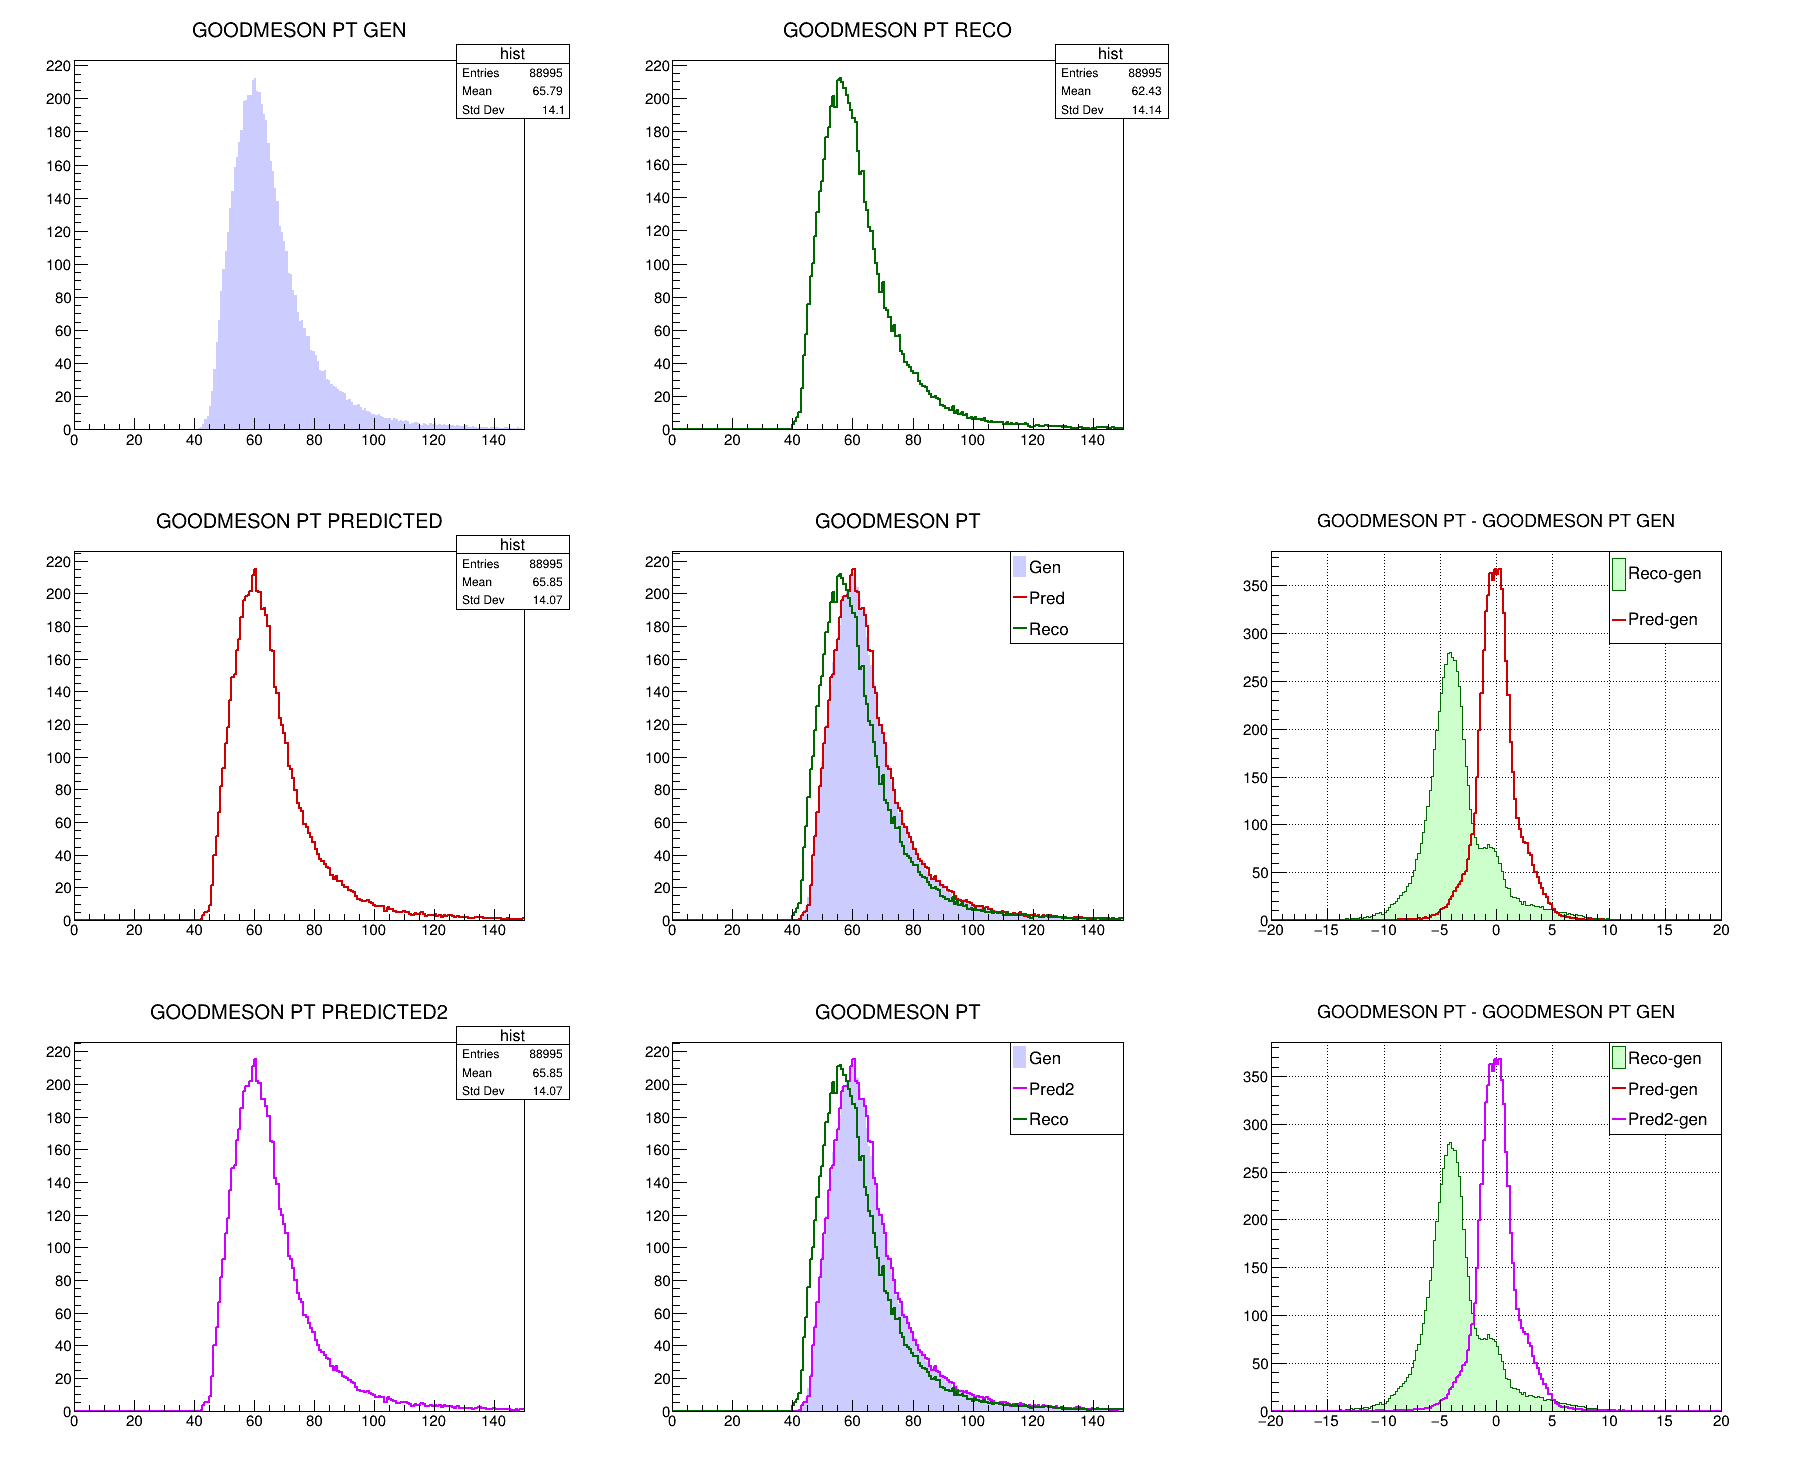

In [5]:
canvas = ROOT.TCanvas("canvas", "canvas", 1800, 1500)
canvas.Divide(3, 3)

nbins, xlow, xhigh = 200, 0, 150
xlowdiff, xhighdiff = -20, 20

h1 = dfSGN0.Histo1D(("hist", "GOODMESON PT GEN", nbins, xlow, xhigh), "goodMeson_pt_GEN", "scale").GetValue()
h1.Add(dfSGN1.Histo1D(("hist", "GOODMESON PT GEN", nbins, xlow, xhigh), "goodMeson_pt_GEN", "scale").GetValue())
h1.Add(dfSGN2.Histo1D(("hist", "GOODMESON PT GEN", nbins, xlow, xhigh), "goodMeson_pt_GEN", "scale").GetValue())

h2 = dfSGN0.Histo1D(("hist", "GOODMESON PT PREDICTED", nbins, xlow, xhigh), "goodMeson_pt_PRED", "scale").GetValue()
h2.Add(dfSGN1.Histo1D(("hist", "GOODMESON PT PREDICTED", nbins, xlow, xhigh), "goodMeson_pt_PRED", "scale").GetValue())
h2.Add(dfSGN2.Histo1D(("hist", "GOODMESON PT PREDICTED", nbins, xlow, xhigh), "goodMeson_pt_PRED", "scale").GetValue())

h22 = dfSGN0.Histo1D(("hist", "GOODMESON PT PREDICTED2", nbins, xlow, xhigh), "goodMeson_pt_PRED2", "scale").GetValue()
h22.Add(dfSGN1.Histo1D(("hist", "GOODMESON PT PREDICTED2", nbins, xlow, xhigh), "goodMeson_pt_PRED2", "scale").GetValue())
h22.Add(dfSGN2.Histo1D(("hist", "GOODMESON PT PREDICTED2", nbins, xlow, xhigh), "goodMeson_pt_PRED2", "scale").GetValue())

h3 = dfSGN0.Histo1D(("hist", "GOODMESON PT RECO", nbins, xlow, xhigh), "goodMeson_pt", "scale").GetValue()
h3.Add(dfSGN1.Histo1D(("hist", "GOODMESON PT RECO", nbins, xlow, xhigh), "goodMeson_pt", "scale").GetValue())
h3.Add(dfSGN2.Histo1D(("hist", "GOODMESON PT RECO", nbins, xlow, xhigh), "goodMeson_pt", "scale").GetValue())

h5_1 = dfSGN0.Define("good", "goodMeson_pt - goodMeson_pt_GEN").Histo1D(("hist", "RECO - GEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue()
h5_1.Add(dfSGN1.Define("good", "goodMeson_pt - goodMeson_pt_GEN").Histo1D(("hist", "RECO - GEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue())
h5_1.Add(dfSGN2.Define("good", "goodMeson_pt - goodMeson_pt_GEN").Histo1D(("hist", "RECO - GEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue())

h5_2 = dfSGN0.Define("good", "goodMeson_pt_PRED - goodMeson_pt_GEN").Histo1D(("hist", "PRED - GEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue()
h5_2.Add(dfSGN1.Define("good", "goodMeson_pt_PRED - goodMeson_pt_GEN").Histo1D(("hist", "PRED - GEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue())
h5_2.Add(dfSGN2.Define("good", "goodMeson_pt_PRED - goodMeson_pt_GEN").Histo1D(("hist", "PRED - GEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue())

h5_22 = dfSGN0.Define("good", "goodMeson_pt_PRED2 - goodMeson_pt_GEN").Histo1D(("hist", "PRED2 - GEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue()
h5_22.Add(dfSGN1.Define("good", "goodMeson_pt_PRED2 - goodMeson_pt_GEN").Histo1D(("hist", "PRED2 - GEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue())
h5_22.Add(dfSGN2.Define("good", "goodMeson_pt_PRED2 - goodMeson_pt_GEN").Histo1D(("hist", "PRED2 - GEN", nbins, xlowdiff, xhighdiff), "good", "scale").GetValue())


h1.SetLineColor(ROOT.kBlue+1)
h1.SetFillColor(ROOT.kBlue-10)
h1.SetLineWidth(0)
h2.SetLineColor(ROOT.kRed+1)
h2.SetLineWidth(2)
h22.SetLineColor(ROOT.kViolet)
h22.SetLineWidth(2)

h3.SetLineColor(ROOT.kGreen+3)
h3.SetLineWidth(2)
h5_2.SetLineColor(ROOT.kRed+1)
h5_2.SetLineWidth(2)
h5_22.SetLineColor(ROOT.kViolet)
h5_22.SetLineWidth(2)
h5_1.SetLineColor(ROOT.kGreen+3)
h5_1.SetFillColor(ROOT.kGreen-10)
h5_1.SetLineWidth(1)

p = canvas.cd(1)
h1.Draw("hist")
p = canvas.cd(2)
h3.Draw("hist")

p = canvas.cd(4)
h2.Draw("hist")

p = canvas.cd(5)
stack = ROOT.THStack("stack", "GOODMESON PT")
stack.Add(h1)
stack.Add(h2)
stack.Add(h3)
stack.Draw("hist nostack")
legend = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend.SetMargin(0.17)
#legend.SetBorderSize(0)
legend.SetTextSize(0.04)
legend.AddEntry(h1, "Gen", "f")
legend.AddEntry(h2, "Pred", "l")
legend.AddEntry(h3, "Reco", "l")
legend.Draw()

p = canvas.cd(6)
stack2 = ROOT.THStack("stack", "GOODMESON PT - GOODMESON PT GEN")
stack2.Add(h5_1)
stack2.Add(h5_2)
stack2.Draw("hist nostack")
legend2 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend2.SetMargin(0.17)
#legend.SetBorderSize(0)
legend2.SetTextSize(0.04)
legend2.AddEntry(h5_1, "Reco-gen", "f")
legend2.AddEntry(h5_2, "Pred-gen", "l")
legend2.Draw()
p.SetGrid()


p = canvas.cd(7)
h22.Draw("hist")

p = canvas.cd(8)
stack3 = ROOT.THStack("stack", "GOODMESON PT")
stack3.Add(h1)
stack3.Add(h22)
stack3.Add(h3)
stack3.Draw("hist nostack")
legend3 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend3.SetMargin(0.17)
#legend.SetBorderSize(0)
legend3.SetTextSize(0.04)
legend3.AddEntry(h1, "Gen", "f")
legend3.AddEntry(h22, "Pred2", "l")
legend3.AddEntry(h3, "Reco", "l")
legend3.Draw()

p = canvas.cd(9)
stack4 = ROOT.THStack("stack", "GOODMESON PT - GOODMESON PT GEN")
stack4.Add(h5_1)
stack4.Add(h5_2)
stack4.Add(h5_22)
stack4.Draw("hist nostack")
legend4 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend4.SetMargin(0.17)
#legend.SetBorderSize(0)
legend4.SetTextSize(0.04)
legend4.AddEntry(h5_1, "Reco-gen", "f")
legend4.AddEntry(h5_2, "Pred-gen", "l")
legend4.AddEntry(h5_22, "Pred2-gen", "l")
legend4.Draw()
p.SetGrid()

canvas.Draw()
print("STD RECO:\t", h5_1.GetStdDev())
print("STD PRED:\t", h5_2.GetStdDev(), " ", round((h5_2.GetStdDev()/h5_1.GetStdDev() - 1)*100, 1), "%")
print("STD PRED2:\t", h5_22.GetStdDev(), " ", round((h5_22.GetStdDev()/h5_1.GetStdDev() - 1)*100, 1), "%")

In [6]:
s = '''
    Double_t fitf(Double_t *x, Double_t *par) {
        
        Double_t aL = pow((par[5]/abs(par[3])), par[5]) * exp(-par[3]*par[3]/2);
        Double_t aR = pow((par[6]/abs(par[4])), par[6]) * exp(-par[4]*par[4]/2);
        Double_t bL = par[5]/abs(par[3]) - abs(par[3]);
        Double_t bR = par[6]/abs(par[4]) - abs(par[4]);

        Double_t arg = (x[0]-par[1])/par[2];
        Double_t val = 0.0;

        if (arg < -par[3]){
                val = aL * pow((bL - arg), -par[5]);
        } else if (arg <= par[4]){
                val = exp(-0.5*arg*arg);
        } else {
                val = aR * pow((bR + arg), -par[6]);
        }

        return par[0] * val;
    }

    TF1 *func = new TF1("crystalball", fitf, 100, 150, 7);  //name, C func, xrange, numParams
    func->SetParameters(1000, 125, 2, 1, 1, 10, 10);                      //Value each param
    func->SetParNames("N", "mu", "sigma", "alphaL", "alphaR", "nL", "nR");   //Name each param
    func->SetParLimits(1, 100, 150); // set limit mu
    func->SetParLimits(2, 0.001, 100); // set limit sigma
    func->SetParLimits(3, 0.001, 100); // set limit alphaL
    func->SetParLimits(4, 0.001, 100); // set limit alphaR
    func->SetParLimits(5, 0.001, 20); // set limit nL
    func->SetParLimits(6, 0.001, 20); // set limit nR
    '''

ROOT.gInterpreter.ProcessLine(s)

s = '''
    Double_t fitf2(Double_t *x, Double_t *par) {
        
        Double_t aL = pow((par[5]/abs(par[3])), par[5]) * exp(-par[3]*par[3]/2);
        Double_t aR = pow((par[6]/abs(par[4])), par[6]) * exp(-par[4]*par[4]/2);
        Double_t bL = par[5]/abs(par[3]) - abs(par[3]);
        Double_t bR = par[6]/abs(par[4]) - abs(par[4]);

        Double_t arg = (x[0]-par[1])/par[2];
        Double_t val = 0.0;

        if (arg < -par[3]){
                val = aL * pow((bL - arg), -par[5]);
        } else if (arg <= par[4]){
                val = exp(-0.5*arg*arg);
        } else {
                val = aR * pow((bR + arg), -par[6]);
        }

        return par[0] * val + par[7];
    }

    TF1 *func = new TF1("crystalball_off", fitf2, 60, 200, 8);  //name, C func, xrange, numParams
    func->SetParameters(1000, 100, 20, 10, 10, 10, 10, 3000);                      //Value each param
    func->SetParNames("N", "mu", "sigma", "alphaL", "alphaR", "nL", "nR");   //Name each param
    func->SetParLimits(1, 60, 180); // set limit mu
    func->SetParLimits(2, 0.001, 100); // set limit sigma
    func->SetParLimits(3, 0.001, 100); // set limit alphaL
    func->SetParLimits(4, 0.001, 100); // set limit alphaR
    func->SetParLimits(5, 0.001, 20); // set limit nL
    func->SetParLimits(6, 0.001, 20); // set limit nR
    '''

ROOT.gInterpreter.ProcessLine(s)

0

RECO 117-133:	 4186.835446281767
PRED 117-133:	 4084.333077032476  + -2.4 %
PRED2 117-133:	 4084.333077032476  + -2.4 %
Maximize RECO:	 98.57889860614807
Maximize PRED:	 104.15578693331153  + 5.7 %
Maximize PRED2:	 104.15578693331153  + 5.7 %
RECO:  100.0 -1535214.8346088773 550.6467381154937
PRED1:  100.0 -2316582.0268469066 528.7913184643797
PRED2:  100.0 -3618631.265196216 528.7913184643797


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


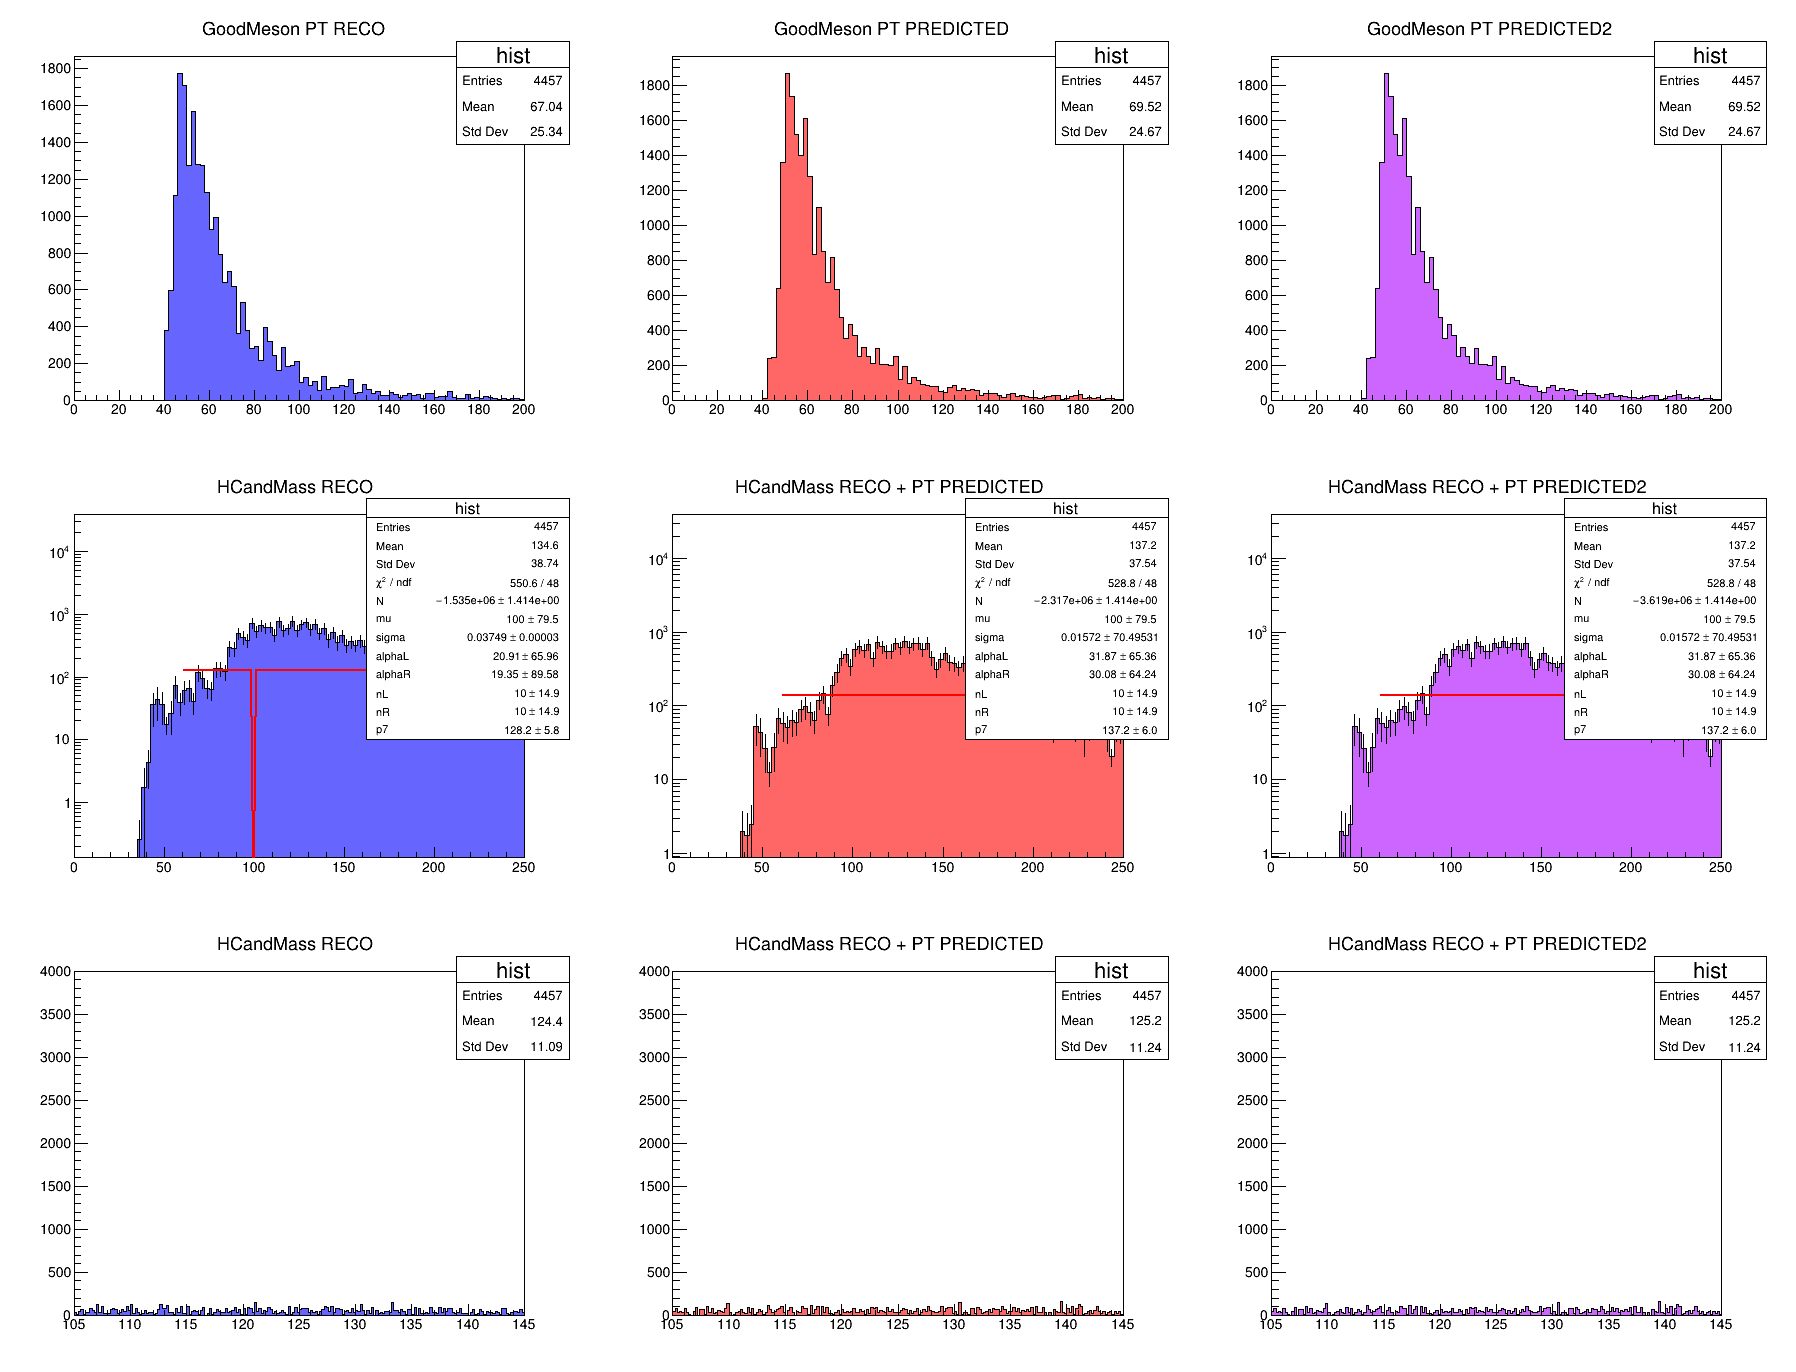

In [7]:
canvas = ROOT.TCanvas("canvas", "canvas", 1800, 1400)
canvas.Divide(3, 3)

nbins, xlow, xhigh = 100, 0, 200
xlowdiff, xhighdiff = 0, 250

h1 = dfBKG.Histo1D(("hist", "GoodMeson PT RECO", nbins, xlow, xhigh), "goodMeson_pt", "scale")
h2 = dfBKG.Histo1D(("hist", "GoodMeson PT PREDICTED", nbins, xlow, xhigh), "goodMeson_pt_PRED", "scale")
h22 = dfBKG.Histo1D(("hist", "GoodMeson PT PREDICTED2", nbins, xlow, xhigh), "goodMeson_pt_PRED2", "scale")

h3 = dfBKG.Histo1D(("hist", "HCandMass RECO", nbins, xlowdiff, xhighdiff), "HCandMass", "scale")
h4 = dfBKG.Histo1D(("hist", "HCandMass RECO + PT PREDICTED", nbins, xlowdiff, xhighdiff), "HCandMass_varPRED", "scale")
h42 = dfBKG.Histo1D(("hist", "HCandMass RECO + PT PREDICTED2", nbins, xlowdiff, xhighdiff), "HCandMass_varPRED2", "scale")
nbins, xlowdiff, xhighdiff = 200, 105, 145
h5 = dfBKG.Histo1D(("hist", "HCandMass RECO", nbins, xlowdiff, xhighdiff), "HCandMass", "scale")
h6 = dfBKG.Histo1D(("hist", "HCandMass RECO + PT PREDICTED", nbins, xlowdiff, xhighdiff), "HCandMass_varPRED", "scale")
h62 = dfBKG.Histo1D(("hist", "HCandMass RECO + PT PREDICTED2", nbins, xlowdiff, xhighdiff), "HCandMass_varPRED2", "scale")

h5.SetMinimum(0)
h6.SetMinimum(0)
h62.SetMinimum(0)

h5.SetMaximum(4000)
h6.SetMaximum(4000)
h62.SetMaximum(4000)

h3.SetMaximum(40000)
h4.SetMaximum(40000)
h42.SetMaximum(40000)

h1.SetFillColor(ROOT.kBlue-7)
h1.SetLineColor(ROOT.kBlack)
h2.SetFillColor(ROOT.kRed-7)
h2.SetLineColor(ROOT.kBlack)
h22.SetFillColor(ROOT.kViolet-4)
h22.SetLineColor(ROOT.kBlack)
h3.SetFillColor(ROOT.kBlue-7)
h3.SetLineColor(ROOT.kBlack)
h4.SetFillColor(ROOT.kRed-7)
h4.SetLineColor(ROOT.kBlack)
h42.SetFillColor(ROOT.kViolet-4)
h42.SetLineColor(ROOT.kBlack)
h5.SetFillColor(ROOT.kBlue-7)
h5.SetLineColor(ROOT.kBlack)
h6.SetFillColor(ROOT.kRed-7)
h6.SetLineColor(ROOT.kBlack)
h62.SetFillColor(ROOT.kViolet-4)
h62.SetLineColor(ROOT.kBlack)


p = canvas.cd(1)
h1.Draw("hist")
p = canvas.cd(2)
h2.Draw("hist")
p = canvas.cd(3)
h22.Draw("hist")

ROOT.gStyle.SetOptFit(1)
p = canvas.cd(4)
p.SetLogy()
h3.Draw("hist")
h3.Fit("crystalball_off", "QM", "", 60., 200.)
h3.Fit("crystalball_off", "QM", "", 60., 200.)
h3.Fit("crystalball_off", "QM", "", 60., 200.)
h3.Fit("crystalball_off", "QM", "", 60., 200.)
h3.Draw("func same")
ROOT.gStyle.SetOptFit(1)
p = canvas.cd(5)
p.SetLogy()
h4.Draw("hist")
h4.Fit("crystalball_off", "QM", "", 60., 200.)
h4.Fit("crystalball_off", "QM", "", 60., 200.)
h4.Fit("crystalball_off", "QM", "", 60., 200.)
h4.Fit("crystalball_off", "QM", "", 60., 200.)
h4.Draw("func same")
ROOT.gStyle.SetOptFit(1)
p = canvas.cd(6)
p.SetLogy()
h42.Draw("hist")
h42.Fit("crystalball_off", "QM", "", 60., 200.)
h42.Fit("crystalball_off", "QM", "", 60., 200.)
h42.Fit("crystalball_off", "QM", "", 60., 200.)
h42.Fit("crystalball_off", "QM", "", 60., 200.)
h42.Draw("func same")

p = canvas.cd(7)
h5.Draw("hist")
p = canvas.cd(8)
h6.Draw("hist")
p = canvas.cd(9)
h62.Draw("hist")

canvas.Draw()

NBkg_reco = h5.Integral(h5.FindBin(117), h5.FindBin(133))
NBkg_pred = h6.Integral(h6.FindBin(117), h6.FindBin(133))
NBkg_pred2 = h62.Integral(h62.FindBin(117), h62.FindBin(133))

print("RECO 117-133:\t", NBkg_reco)
print("PRED 117-133:\t", NBkg_pred, " +", round((NBkg_pred/NBkg_reco - 1)*100, 1), "%")
print("PRED2 117-133:\t", NBkg_pred2, " +", round((NBkg_pred2/NBkg_reco - 1)*100, 1), "%")

eff_reco = NSig_reco/np.sqrt(NBkg_reco)
eff_pred = NSig_pred/np.sqrt(NBkg_pred)
eff_pred2 = NSig_pred2/np.sqrt(NBkg_pred2)

print("Maximize RECO:\t", eff_reco)
print("Maximize PRED:\t", eff_pred, " +", round((eff_pred/eff_reco - 1)*100, 1), "%")
print("Maximize PRED2:\t", eff_pred2, " +", round((eff_pred2/eff_reco - 1)*100, 1), "%")


mu, n, chi = h3.GetFunction("crystalball_off").GetParameter(1), h3.GetFunction("crystalball_off").GetParameter(0), h3.GetFunction("crystalball_off").GetChisquare()
mu1, n1, chi1 = h4.GetFunction("crystalball_off").GetParameter(1), h4.GetFunction("crystalball_off").GetParameter(0), h4.GetFunction("crystalball_off").GetChisquare()
mu2, n2, chi2 = h42.GetFunction("crystalball_off").GetParameter(1), h42.GetFunction("crystalball_off").GetParameter(0), h42.GetFunction("crystalball_off").GetChisquare()

print("RECO: ", mu, n, chi)
print("PRED1: ", mu1, n1, chi1)
print("PRED2: ", mu2, n2, chi2)

125.20540593928587 78.99110420280812 399.66318142562574 13.04908049917547
125.20539425331529 78.9900910305809 399.6631813374184 13.049189769425691


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


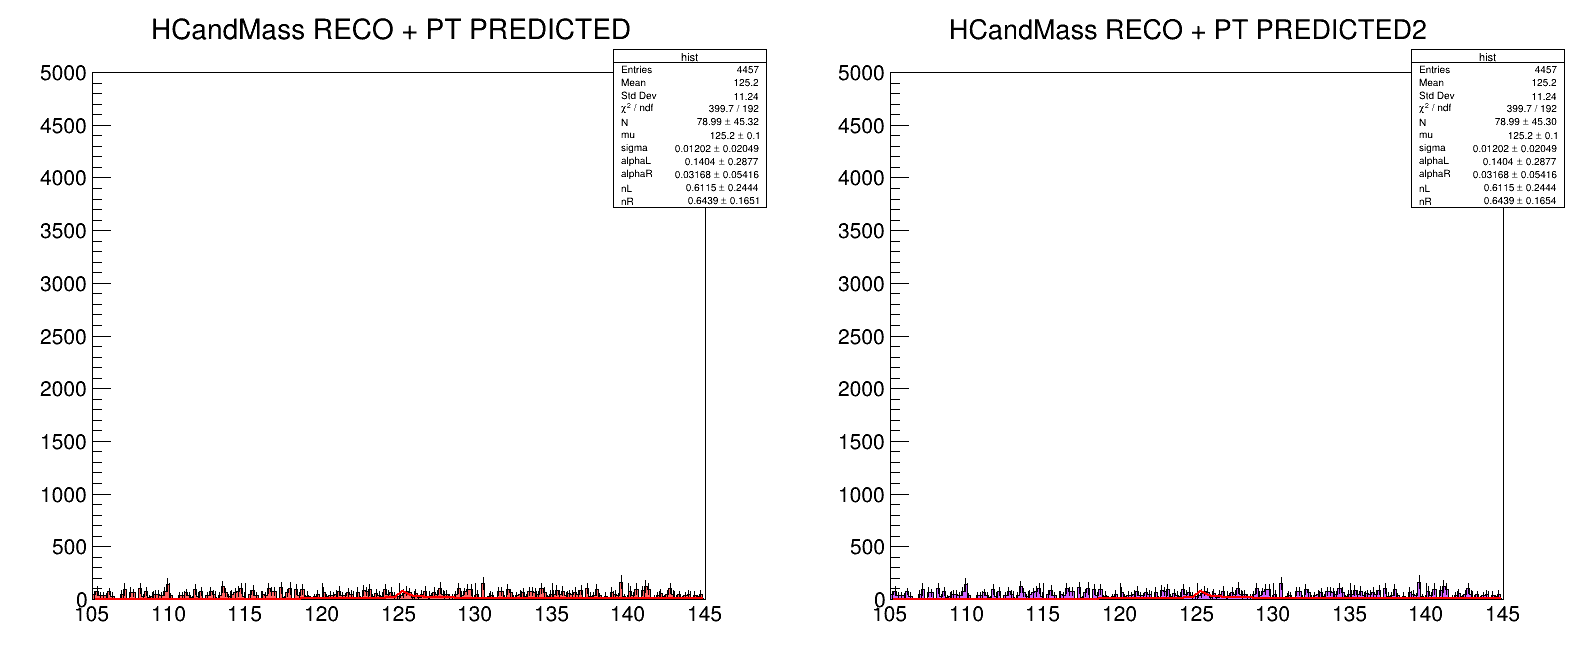

In [8]:
ROOT.gStyle.SetOptFit(1)
canvas = ROOT.TCanvas("canvas", "canvas", 1600, 700)
canvas.Divide(2, 1)

h6.SetMaximum(5000)
h62.SetMaximum(5000)


p = canvas.cd(1)
h6.Draw("hist")
h6.Fit("crystalball", "QM", "", 100., 150.)
h6.Fit("crystalball", "QM", "", 100., 150.)
h6.Fit("crystalball", "QM", "", 100., 150.)
h6.Fit("crystalball", "QM", "", 100., 150.)
h6.Draw("func same")

ROOT.gStyle.SetOptFit(1)

p = canvas.cd(2)
h62.Draw("hist")
h62.Fit("crystalball", "QM", "", 100., 150.)
h62.Fit("crystalball", "QM", "", 100., 150.)
h62.Fit("crystalball", "QM", "", 100., 150.)
h62.Fit("crystalball", "QM", "", 100., 150.)
h62.Draw("func same")

canvas.Draw()

def sigmoid(x, a=0.4, b=113):
    return 1/(1+np.exp(-a*(x-b)))


def getLoss(mu, N=4000, integral=180000):
    return -np.log(abs(mu-125)**2/(1+np.exp(0.3*(mu-100)))) + N/1000 + np.sqrt(integral)/28.5



mu1, n1, chi1 = h6.GetFunction("crystalball").GetParameter(1), h6.GetFunction("crystalball").GetParameter(0), h6.GetFunction("crystalball").GetChisquare()
mu2, n2, chi2 = h62.GetFunction("crystalball").GetParameter(1), h62.GetFunction("crystalball").GetParameter(0), h62.GetFunction("crystalball").GetChisquare()

print(mu1, n1, chi1, getLoss(mu1, n1, NBkg_pred))
print(mu2, n2, chi2, getLoss(mu2, n2, NBkg_pred2))



0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


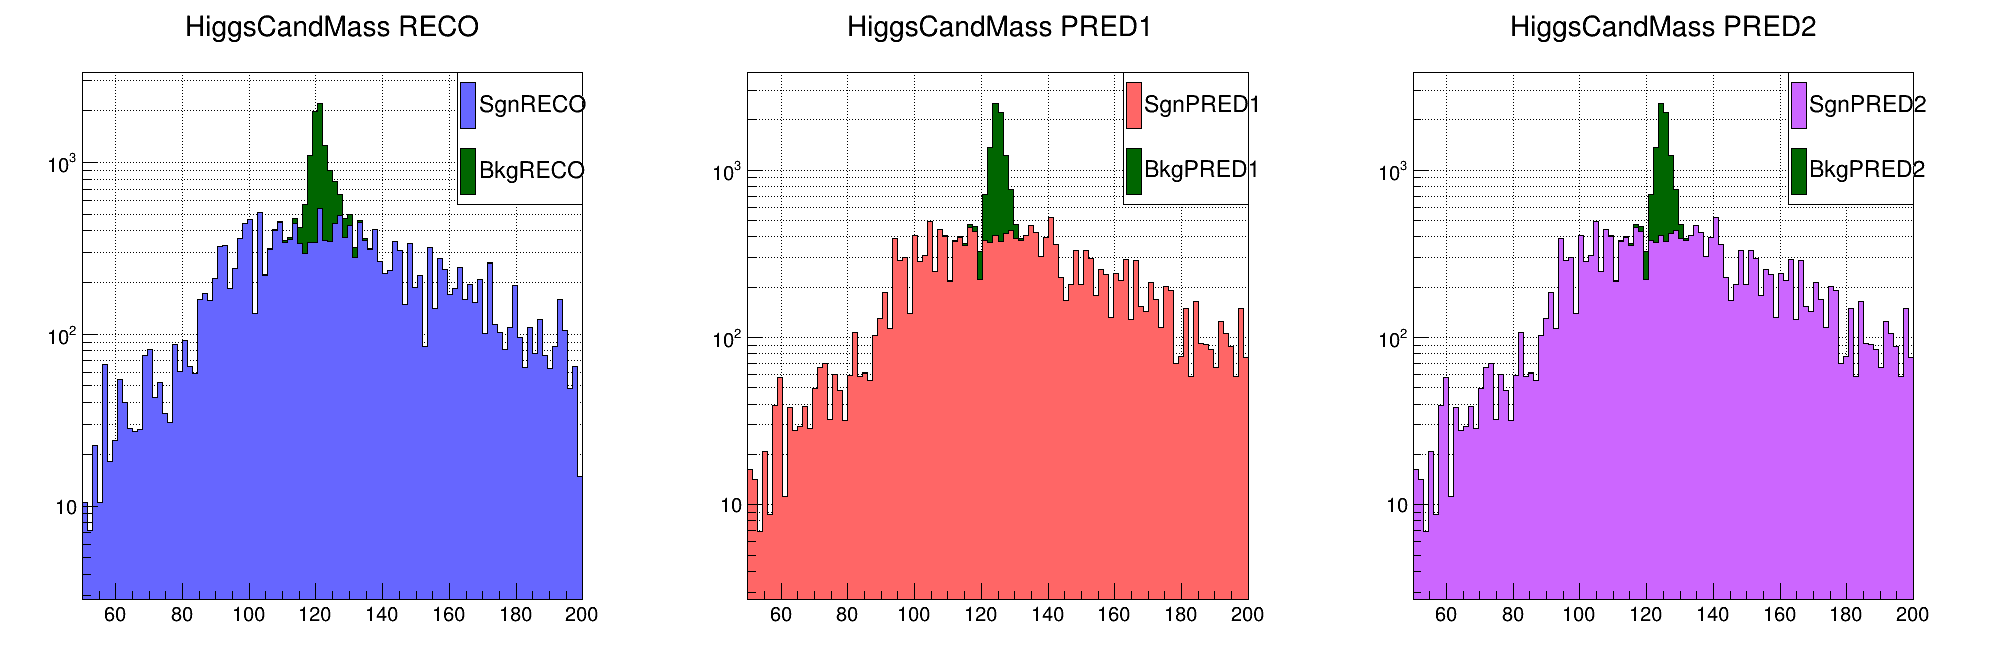

In [9]:
print("0")
canvas = ROOT.TCanvas("canvas", "canvas", 2000, 700)
canvas.Divide(3, 1)

nbins, xlow, xhigh = 100, 50, 200

h2SGN = dfSGN0.Histo1D(("hist", "HCandMass RECO", nbins, xlow, xhigh), "HCandMass", "scale").GetValue()
h2SGN.Add(dfSGN1.Histo1D(("hist", "HCandMass RECO", nbins, xlow, xhigh), "HCandMass", "scale").GetValue())
h2SGN.Add(dfSGN2.Histo1D(("hist", "HCandMass RECO", nbins, xlow, xhigh), "HCandMass", "scale").GetValue())

h3SGN = dfSGN0.Histo1D(("hist", "HCandMass RECO + PT PREDICTED", nbins, xlow, xhigh), "HCandMass_varPRED", "scale").GetValue()
h3SGN.Add(dfSGN1.Histo1D(("hist", "HCandMass RECO + PT PREDICTED", nbins, xlow, xhigh), "HCandMass_varPRED", "scale").GetValue())
h3SGN.Add(dfSGN2.Histo1D(("hist", "HCandMass RECO + PT PREDICTED", nbins, xlow, xhigh), "HCandMass_varPRED", "scale").GetValue())

h32SGN = dfSGN0.Histo1D(("hist", "HCandMass RECO + PT PREDICTED2", nbins, xlow, xhigh), "HCandMass_varPRED2", "scale").GetValue()
h32SGN.Add(dfSGN1.Histo1D(("hist", "HCandMass RECO + PT PREDICTED2", nbins, xlow, xhigh), "HCandMass_varPRED2", "scale").GetValue())
h32SGN.Add(dfSGN2.Histo1D(("hist", "HCandMass RECO + PT PREDICTED2", nbins, xlow, xhigh), "HCandMass_varPRED2", "scale").GetValue())

h3BKG = dfBKG.Histo1D(("hist", "HCandMass RECO", nbins, xlow, xhigh), "HCandMass", "scale").GetValue()
h4BKG = dfBKG.Histo1D(("hist", "HCandMass RECO + PT PREDICTED", nbins, xlow, xhigh), "HCandMass_varPRED", "scale").GetValue()
h42BKG = dfBKG.Histo1D(("hist", "HCandMass RECO + PT PREDICTED2", nbins, xlow, xhigh), "HCandMass_varPRED2", "scale").GetValue()

h3BKG.SetMaximum(40000)
h4BKG.SetMaximum(40000)
h42BKG.SetMaximum(40000)

h3BKG.SetFillColor(ROOT.kBlue-7)
h3BKG.SetLineColor(ROOT.kBlack)
h4BKG.SetFillColor(ROOT.kRed-7)
h4BKG.SetLineColor(ROOT.kBlack)
h42BKG.SetFillColor(ROOT.kViolet-4)
h42BKG.SetLineColor(ROOT.kBlack)

h2SGN.SetFillColor(ROOT.kGreen+3)
h2SGN.SetLineColor(ROOT.kBlack)
h3SGN.SetFillColor(ROOT.kGreen+3)
h3SGN.SetLineColor(ROOT.kBlack)
h32SGN.SetFillColor(ROOT.kGreen+3)
h32SGN.SetLineColor(ROOT.kBlack)

p = canvas.cd(1)
stack = ROOT.THStack("stack", "HiggsCandMass RECO")
stack.Add(h3BKG)
stack.Add(h2SGN)
stack.Draw("hist")
legend = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend.SetMargin(0.17)
legend.SetTextSize(0.04)
legend.AddEntry(h3BKG, "SgnRECO", "f")
legend.AddEntry(h2SGN, "BkgRECO", "f")
legend.Draw()
p.SetGrid()
p.SetLogy()

p = canvas.cd(2)
stack2 = ROOT.THStack("stack", "HiggsCandMass PRED1")
stack2.Add(h4BKG)
stack2.Add(h3SGN)
stack2.Draw("hist")
legend2 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend2.SetMargin(0.17)
legend2.SetTextSize(0.04)
legend2.AddEntry(h4BKG, "SgnPRED1", "f")
legend2.AddEntry(h3SGN, "BkgPRED1", "f")
legend2.Draw()
p.SetGrid()
p.SetLogy()

p = canvas.cd(3)
stack3 = ROOT.THStack("stack", "HiggsCandMass PRED2")
stack3.Add(h42BKG)
stack3.Add(h32SGN)
stack3.Draw("hist")
legend3 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend3.SetMargin(0.17)
legend3.SetTextSize(0.04)
legend3.AddEntry(h42BKG, "SgnPRED2", "f")
legend3.AddEntry(h32SGN, "BkgPRED2", "f")
legend3.Draw()
p.SetGrid()
p.SetLogy()

canvas.Draw()

0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


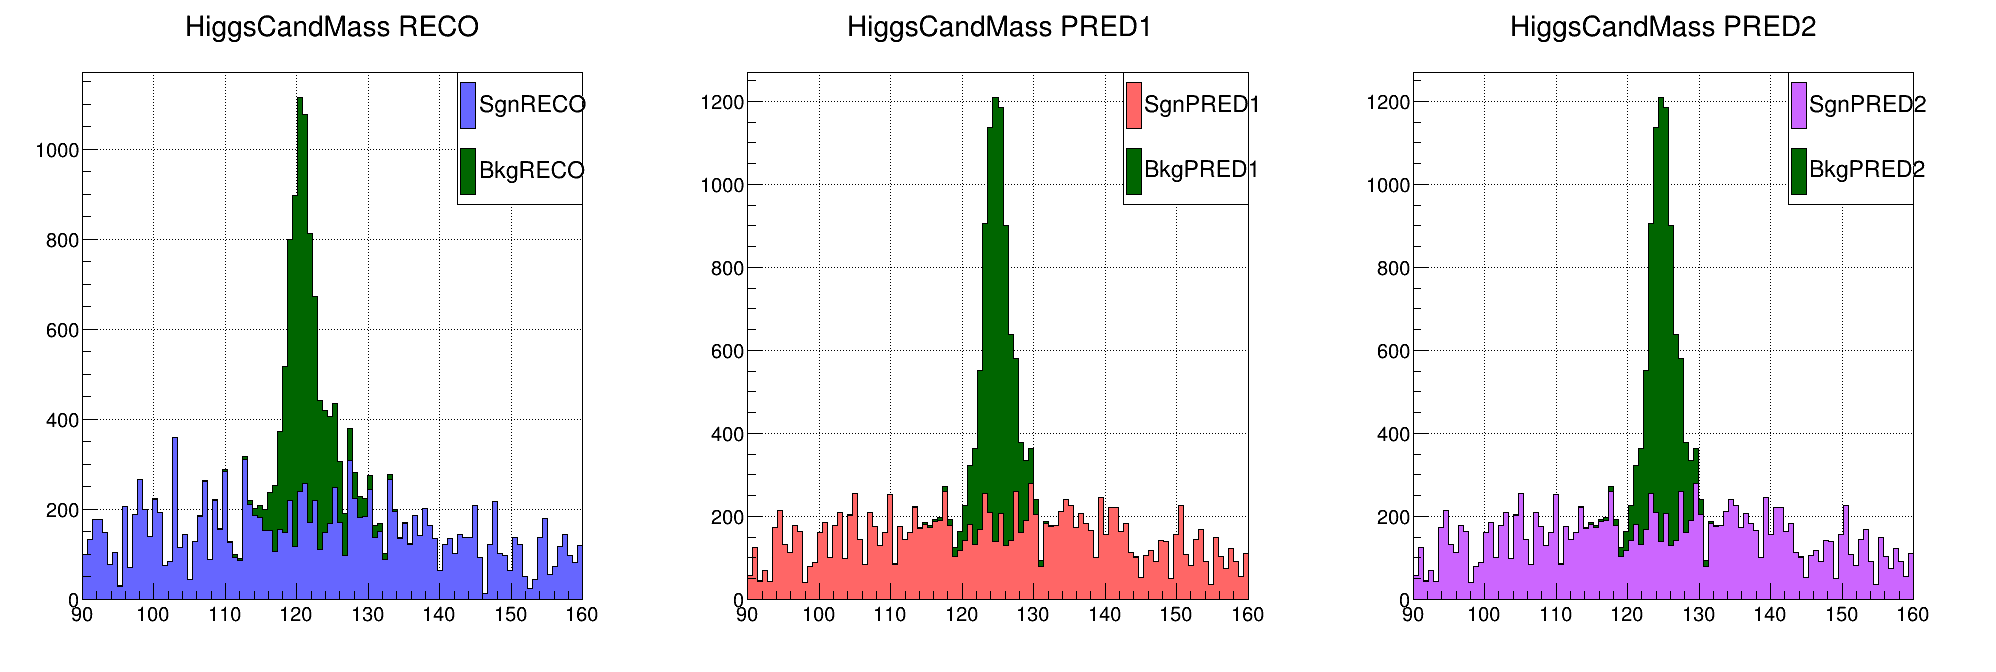

In [10]:
print("0")
canvas = ROOT.TCanvas("canvas", "canvas", 2000, 700)
canvas.Divide(3, 1)

nbins, xlow, xhigh = 100, 90, 160

h2SGN = dfSGN0.Histo1D(("hist", "HCandMass RECO", nbins, xlow, xhigh), "HCandMass", "scale").GetValue()
h2SGN.Add(dfSGN1.Histo1D(("hist", "HCandMass RECO", nbins, xlow, xhigh), "HCandMass", "scale").GetValue())
h2SGN.Add(dfSGN2.Histo1D(("hist", "HCandMass RECO", nbins, xlow, xhigh), "HCandMass", "scale").GetValue())

h3SGN = dfSGN0.Histo1D(("hist", "HCandMass RECO + PT PREDICTED", nbins, xlow, xhigh), "HCandMass_varPRED", "scale").GetValue()
h3SGN.Add(dfSGN1.Histo1D(("hist", "HCandMass RECO + PT PREDICTED", nbins, xlow, xhigh), "HCandMass_varPRED", "scale").GetValue())
h3SGN.Add(dfSGN2.Histo1D(("hist", "HCandMass RECO + PT PREDICTED", nbins, xlow, xhigh), "HCandMass_varPRED", "scale").GetValue())

h32SGN = dfSGN0.Histo1D(("hist", "HCandMass RECO + PT PREDICTED2", nbins, xlow, xhigh), "HCandMass_varPRED2", "scale").GetValue()
h32SGN.Add(dfSGN1.Histo1D(("hist", "HCandMass RECO + PT PREDICTED2", nbins, xlow, xhigh), "HCandMass_varPRED2", "scale").GetValue())
h32SGN.Add(dfSGN2.Histo1D(("hist", "HCandMass RECO + PT PREDICTED2", nbins, xlow, xhigh), "HCandMass_varPRED2", "scale").GetValue())

h3BKG = dfBKG.Histo1D(("hist", "HCandMass RECO", nbins, xlow, xhigh), "HCandMass", "scale").GetValue()
h4BKG = dfBKG.Histo1D(("hist", "HCandMass RECO + PT PREDICTED", nbins, xlow, xhigh), "HCandMass_varPRED", "scale").GetValue()
h42BKG = dfBKG.Histo1D(("hist", "HCandMass RECO + PT PREDICTED2", nbins, xlow, xhigh), "HCandMass_varPRED2", "scale").GetValue()

h3BKG.SetMaximum(40000)
h4BKG.SetMaximum(40000)
h42BKG.SetMaximum(40000)

h3BKG.SetFillColor(ROOT.kBlue-7)
h3BKG.SetLineColor(ROOT.kBlack)
h4BKG.SetFillColor(ROOT.kRed-7)
h4BKG.SetLineColor(ROOT.kBlack)
h42BKG.SetFillColor(ROOT.kViolet-4)
h42BKG.SetLineColor(ROOT.kBlack)

h2SGN.SetFillColor(ROOT.kGreen+3)
h2SGN.SetLineColor(ROOT.kBlack)
h3SGN.SetFillColor(ROOT.kGreen+3)
h3SGN.SetLineColor(ROOT.kBlack)
h32SGN.SetFillColor(ROOT.kGreen+3)
h32SGN.SetLineColor(ROOT.kBlack)

p = canvas.cd(1)
stack = ROOT.THStack("stack", "HiggsCandMass RECO")
stack.Add(h3BKG)
stack.Add(h2SGN)
stack.Draw("hist")
legend = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend.SetMargin(0.17)
legend.SetTextSize(0.04)
legend.AddEntry(h3BKG, "SgnRECO", "f")
legend.AddEntry(h2SGN, "BkgRECO", "f")
legend.Draw()
p.SetGrid()

p = canvas.cd(2)
stack2 = ROOT.THStack("stack", "HiggsCandMass PRED1")
stack2.Add(h4BKG)
stack2.Add(h3SGN)
stack2.Draw("hist")
legend2 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend2.SetMargin(0.17)
legend2.SetTextSize(0.04)
legend2.AddEntry(h4BKG, "SgnPRED1", "f")
legend2.AddEntry(h3SGN, "BkgPRED1", "f")
legend2.Draw()
p.SetGrid()

p = canvas.cd(3)
stack3 = ROOT.THStack("stack", "HiggsCandMass PRED2")
stack3.Add(h42BKG)
stack3.Add(h32SGN)
stack3.Draw("hist")
legend3 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend3.SetMargin(0.17)
legend3.SetTextSize(0.04)
legend3.AddEntry(h42BKG, "SgnPRED2", "f")
legend3.AddEntry(h32SGN, "BkgPRED2", "f")
legend3.Draw()
p.SetGrid()

canvas.Draw()

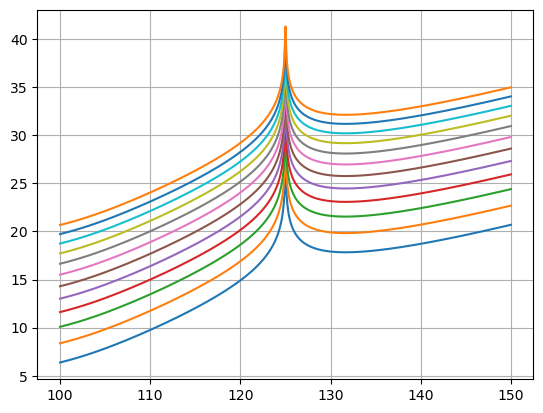

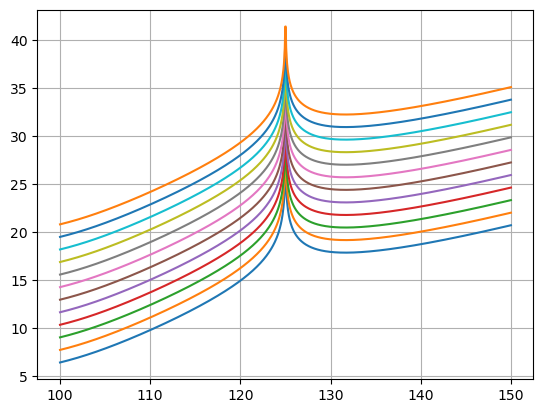

In [11]:
def sigmoid(x, a=0.2, b=105):
    return 1/(1+np.exp(-a*(x-b)))


def getLoss(mu, N=4000, integral=180000):
    return -np.log(abs(mu-125)**2/(1+np.exp(0.3*(mu-100)))) + N/1000 + np.sqrt(integral)/28.5
    #return -np.log(abs(mu-125)/(N**4*integral**4)/(1+np.exp(0.1*(mu-100)))) + N/1000 + np.sqrt(integral)

masses = np.linspace(100, 150, 1000)
constants = np.linspace(1600, 16000, 12)
integrals = np.linspace(90000, 500000, 12)

for i in integrals:
    plt.plot(masses, getLoss(masses, N=constants[0], integral=i))
plt.grid()
plt.show()

for c in constants:
    plt.plot(masses, getLoss(masses, N=c, integral=integrals[0]))
plt.grid()
plt.show()

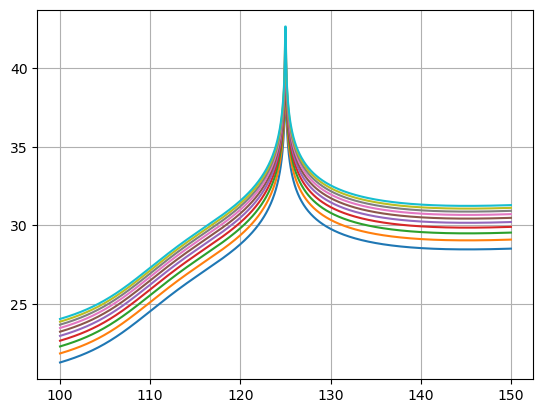

In [12]:
def sigmoid(x, a=0.4, b=113):
    return 1/(1+np.exp(-a*(x-b)))


def getLoss(mu, N, integral=120000):
    return -np.log((mu-125)**2/(N**2*integral)/(1+20*sigmoid(mu))/(1+np.exp(0.1*(mu-100))))

masses = np.linspace(100, 150, 1000)
constants = np.linspace(2000, 8000, 10)

for c in constants:
    plt.plot(masses, getLoss(masses, c))
plt.grid()
plt.show()

In [13]:
canvas = ROOT.TCanvas("canvas", "canvas", 1000, 700)
canvas.Divide(1, 1)

nbin, xlow, xhigh = 10*200, 0, 200

cat = "GFcat"
year = 2018
date = "AUG24"
title="test"


chain = ROOT.TChain("events")
for num in [1039]:
#for num in [10,11,12,13,14]:
    chain.Add("/data/submit/pdmonte/outputs/{}/{}/outname_mc{}_{}_{}_{}.root".format(date, year, num, cat, mesonCat, year))

df = ROOT.RDataFrame(chain)


h = df.Define("scale", "w*lumiIntegrated").Histo1D(("m_{H}", title, nbin, xlow, xhigh), "HCandMass", "scale").GetValue()
h.GetXaxis().SetRangeUser(100, 150)
h.SetMinimum(0)
h.SetMarkerSize(0.7)
h.SetMarkerStyle(ROOT.kFullCircle)
h.Draw("")

canvas.Draw()

runtime_error: Template method resolution failed:
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Define(basic_string_view<char,char_traits<char> > name, basic_string_view<char,char_traits<char> > expression) =>
    runtime_error: GetBranchNames: error in opening the tree events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Define(basic_string_view<char,char_traits<char> > name, basic_string_view<char,char_traits<char> > expression) =>
    runtime_error: GetBranchNames: error in opening the tree events

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Error in <TFile::TFile>: file /data/submit/pdmonte/outputs/AUG24/2018/outname_mc1039_GFcat_D0StarCat_2018.root does not exist
Error in <TFile::TFile>: file /data/submit/pdmonte/outputs/AUG24/2018/outname_mc1039_GFcat_D0StarCat_2018.root does not exist
